In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [3]:
(X_train, y_train), (X_test, y_test)= datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 49s 0us/step


TypeError: 'tuple' object is not callable

In [4]:
X_train.shape

(50000, 32, 32, 3)

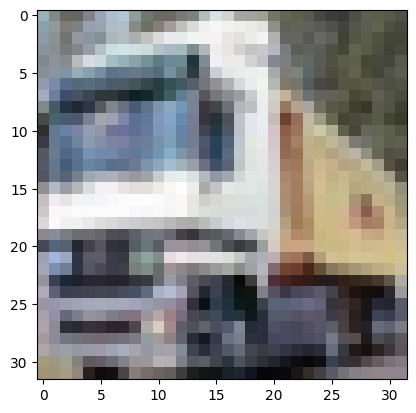

In [6]:
plt.imshow(X_train[1])

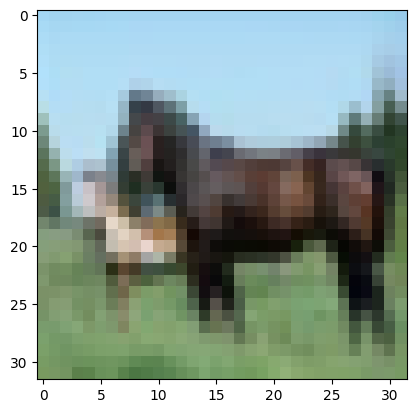

In [8]:
plt.imshow(X_train[12])

In [9]:
y_train.shape

(50000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [17]:
y_test = y_test.reshape(-1,)

In [12]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

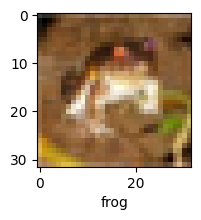

In [14]:
plot_sample(X_train, y_train, 0)

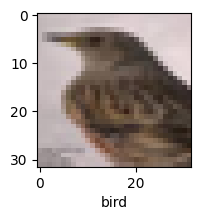

In [15]:
plot_sample(X_train, y_train, 18)

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 42ms/step - accuracy: 0.3061 - loss: 1.9246
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.4226 - loss: 1.6430
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 39ms/step - accuracy: 0.4582 - loss: 1.5551
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.4762 - loss: 1.4964
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.4950 - loss: 1.4354


In [19]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.39      0.73      0.51      1000
           1       0.39      0.82      0.53      1000
           2       0.35      0.44      0.39      1000
           3       0.44      0.22      0.29      1000
           4       0.39      0.44      0.41      1000
           5       0.58      0.22      0.32      1000
           6       0.53      0.50      0.51      1000
           7       0.67      0.38      0.49      1000
           8       0.74      0.39      0.51      1000
           9       0.53      0.39      0.45      1000

    accuracy                           0.45     10000
   macro avg       0.50      0.45      0.44     10000
weighted avg       0.50      0.45      0.44     10000



In [20]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.3794 - loss: 1.7100
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - accuracy: 0.6061 - loss: 1.1345
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6601 - loss: 0.9711
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6916 - loss: 0.8784
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7186 - loss: 0.8089
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7360 - loss: 0.7629
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7544 - loss: 0.7083
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7680 - loss: 0.6706
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 19ms/step - accuracy: 0.7832 - loss: 0.6243
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.7939 - loss: 0.5875


In [23]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7008 - loss: 0.9114


[0.9194851517677307, 0.7017999887466431]

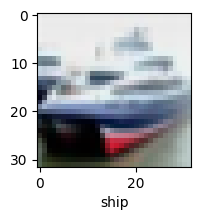

In [25]:
plot_sample(X_test, y_test,1)

In [26]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


array([[2.82729670e-05, 9.09833907e-05, 2.33889732e-04, 8.28434646e-01,
        2.08370420e-05, 3.46627794e-02, 5.27935149e-03, 4.91160863e-05,
        1.31168962e-01, 3.12451048e-05],
       [1.45766608e-05, 1.22980438e-02, 1.83759965e-07, 1.68593903e-08,
        4.65692318e-10, 5.03696460e-11, 1.85813212e-10, 1.06140680e-10,
        9.87655580e-01, 3.15428988e-05],
       [5.29999547e-02, 2.08764404e-01, 7.30507541e-04, 1.05886988e-03,
        1.24919825e-04, 2.59915687e-04, 3.91158537e-05, 8.17856006e-03,
        7.16278970e-01, 1.15648154e-02],
       [8.39943051e-01, 2.01961352e-03, 7.27893114e-02, 2.11142842e-03,
        6.33860182e-05, 5.76492603e-05, 8.00560956e-05, 5.78607387e-06,
        8.27395394e-02, 1.90184437e-04],
       [3.76160472e-07, 3.96029805e-07, 1.24240614e-01, 8.25094152e-03,
        1.58161968e-01, 1.43307334e-04, 7.09158361e-01, 3.44744440e-05,
        9.15973214e-06, 3.48283322e-07]], dtype=float32)

In [27]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [28]:
classes[y_classes[1]]

'ship'